# Surface plasmon resonance (SPR) modeling & analysis

This workbook models the reflectance equations in the Simon, Mitchell & Watson paper, American Journal of Physics, Vol. 43, No. 7, pp. 630-636 (1975).

Use this template as a starting point to carry out the analysis tasks.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## Standard Packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.
* [LMFit](https://lmfit.github.io/lmfit-py/) is excellent for carrying out line and curve fits with many useful features.

## Getting Help

See the example code for a wide range of actions in notebooks created by Prof. Marjorie Olmstead and Prof. David Pengra in this repository: [**Physics431/Examples**](https://github.com/Physics431/Examples).

You can pull the examples into your environment with the following command.  (Only do this once, or you will get an error):

    git clone https://github.com/Physics431/Examples

## Task Summary

The SPR modeling analysis program creates a curve following the reflectance formula given in the paper by Simon, Mitchell and Watson, Eq. (11).  Your task is to recreate this function with Python code and plot it under your data points for at least one or two data sets.  This will give you deeper insight into the fitting formula.

Start by creating functions for the quantities that go into Eq. (11).  These are Eqs. (7), (9b) and (9c), along with Eqs. (10a) and (10b).  The quantities that feed in are the complex dielectric permittivity  and the index of reflection of the glass $n$, along with $\omega/c=k_0=2\pi/\lambda$. 

Then combine the functions into a single one that gives the reflectance R, Eq. (11).

Be careful to convert your angles from degrees to radians before feeding them to the functions!  (This is the most common mistake students make.)

You will need to make sure all quantities are represented by complex data types, even if the physical quantity is real-valued.

Once you have a working function, you may try to see if you can make it work with LMfit.  In principal this is possible, but prepare for some challenges if your function is not of the required form for LMfit’s library calls. 


In [36]:
# Usually import packages via a handle to the functions in them using import ... as ...
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [37]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,6.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Reflectance modeling equations 

Main equation for normalized reflected intensity (SMW, Eq. 11):

$$R = \left|\frac{r_{pm} + r_{ma}\exp(-2kd)}{1+r_{pm}r_{ma}\exp(-2kd)}\right|**2$$

where $r_{pm}$ and $r_{ma}$ are the reflection amplitudes from the prism-metal interface and the metal-air interface, and $d$ is the film thickness.

The parameter $k$ is the "absorption coefficient at non-normal incidence" (SMW, Eq. 7):

$$k = -i\frac{\omega}{c}\left(\epsilon - n**2\sin**2\theta_1\right)**{1/2}$$

We replace $\omega/c$ with the wavenumber in free space $k_0=2\pi/\lambda_0$ of the incident light.

The reflection amplitudes are given by (SMW, Eq. 9b)

$$r_{pm} = \frac{\epsilon**{1/2}\cos\theta_1 - n\cos\theta_2}{\epsilon**{1/2}\cos\theta_1 + n\cos\theta_2}$$
and (SMW, Eq. 9c)
$$r_{ma} = \frac{\cos\theta_2 - \epsilon**{1/2}\cos\theta_3}{\cos\theta_2 + \epsilon**{1/2}\cos\theta_3}$$

where (SMW, Eq. 10a)

$$\cos\theta_2 = \left(1-(n**2/\epsilon)\sin**2\theta_1\right)**{1/2}$$
and (SMW, Eq. 10b)
$$\cos\theta_3 = \left(1-n**2\sin**2\theta_1\right)**{1/2}$$

### Create functions for the above equations

Make Python functions that carry out the calculations for each of the above equations.

To evaulate the functions, you will need the following constants
* The values of the wavelengths for the green and red laser light in vacuum
* The values of the prism's refractive index for those two wavelenths

The arguments to the function will include
* The incident angle $\theta_1$ in radians(!)
* The complex dielectric permittivity $\epsilon$
* The metal film thickness $d$

The functions should all return complex values except the one for Eq. (11) the reflectance $R$.  If you convert all inputs to the functions to complex, the return value will automatically be complex.

Units: if $k$ is in inverse nanometers, then $d$ should be in nanometers, otherwise all othe constants are unitless.

In [38]:
# Enter the appropriate values
wavelength_green = 543.5 #nanometers
wavelength_red = 632.8 #nanometers
N_red = 1.515 # unitless
N_green = 1.519 # unitless

# Pulled from red #3 model fit
d_default = 60.88 # nanometers
eps_default = complex(-9.006,0.476) 
one = complex(1.0, 0.0)
minus_i = complex(0.0, -1.0)

wavenum_red = 2.0*np.pi/wavelength_red
wavenum_green = 2.0*np.pi/wavelength_green

Build the functions.

In [39]:
def cos_theta2(theta_1, epsilon, N):
    '''
    Returns cos(theta_2), Eq. 10a
    '''
    cos_th2 = np.sqrt(one - (N**2/epsilon) * np.sin(theta_1)**2)
    return cos_th2

def cos_theta3(theta_1, N):
    '''
    Returns cos(theta_3), Eq. 10b
    '''
    cos_th3 = np.sqrt(one - N**2 * np.sin(theta_1)**2)
    return cos_th3

def k_plas(theta_1, epsilon, N, wavenum):
    '''
    Returns the k value for the plasmon, Eq. 7
    '''
    k_p = minus_i * wavenum * np.sqrt(epsilon - N**2 * np.sin(theta_1)**2)
    return k_p

def r_ma(theta_1, epsilon, N):
    '''
    Returns r_ma also called r_23, Eq. 9c
    '''
    r_23 = (cos_theta2(theta_1, epsilon,N) - np.sqrt(epsilon) * cos_theta3(theta_1,N))/(cos_theta2(theta_1, epsilon,N) + np.sqrt(epsilon) * cos_theta3(theta_1,N))
    return r_23

def r_pm(theta_1, epsilon, N):
    '''
    Returns r_pm also called r_12, Eq. 9b
    '''
    r_12 = (np.sqrt(epsilon) * np.cos(theta_1) - N * cos_theta2(theta_1, epsilon, N))/(np.sqrt(epsilon) * np.cos(theta_1) + N * cos_theta2(theta_1, epsilon, N))
    return r_12

def R(theta_1, epsilon = eps_default, d=d_default, N = N_red, wavenum = wavenum_red):
    '''
    Calculate the reflectance for the surface plasmon, Eq. 11
    Function calls k(theta_1, epsilon, N, wavenum), 
    r_pm(theta_1, epsilon, n) and r_ma(theta_1, epsilon, n).
    '''
    big_R = (np.abs((r_pm(theta_1,epsilon,N) + r_ma(theta_1,epsilon,N) * np.exp(-2 * k_plas(theta_1,epsilon,N,wavenum) * d))/(one+r_pm(theta_1,epsilon,N) * r_ma(theta_1,epsilon,N) * np.exp(-2 * k_plas(theta_1,epsilon,N,wavenum) * d))))**2
    return big_R

### Test the reflectance 

Test the above functions by feeding in a range of angles typical for the experiment, say between 41 and 50 degrees.  (Don't forget to convert to radians, or you will get some strange looking curves.) Use your fit resuslts from the LabVIEW analysis.

You can use the NumPy function `np.linspace()` to genrate an array of evenly spaced values between a lower and upper limit.  For example to get an array of 500 numbers between 41 and 50, do this:

    angles =  np.linspace(41.0,50.0,500)

In [40]:
angles = np.linspace(41,50,999) # set a range of angles
rad_angles = (np.pi/180.0)*angles # convert them to radians to pass to functions

## Make a plot

Make a quick plot to test it.

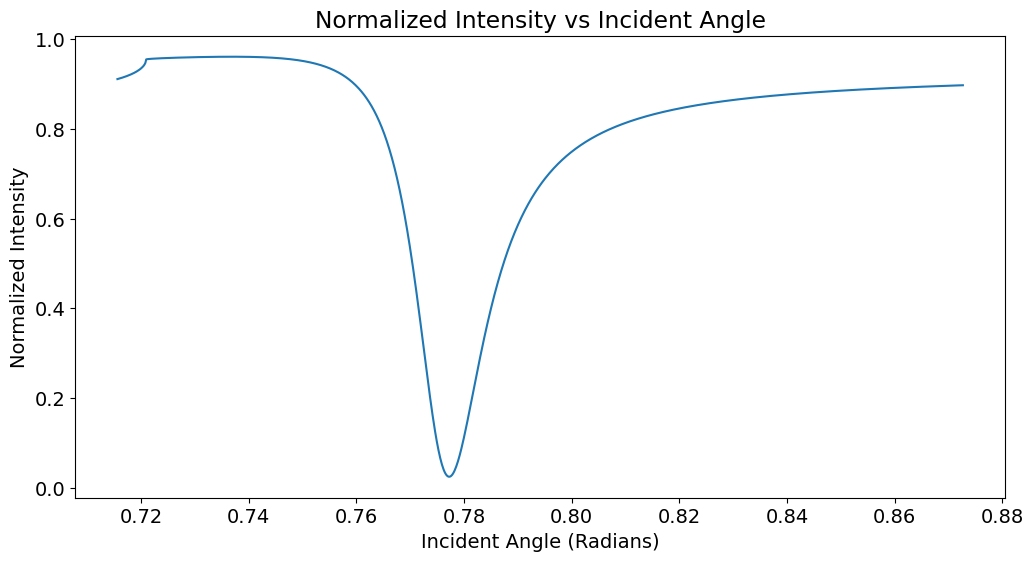

In [41]:
# Tested with degrees initially to ensure the plot matches our experimental plot
intensities = R(rad_angles)
plt.plot(rad_angles,intensities)
plt.title('Normalized Intensity vs Incident Angle')
plt.xlabel('Incident Angle (Radians)')
plt.ylabel('Normalized Intensity')
plt.show()

## Plot the model against data

### Read in a data file

The data files are simple tab-delimited text files that can be read in with Pandas `pd.read_csv()`:
    
    red3_data = pd.read_csv('red_Ag_3.csv',sep='\t')

In [42]:
red3_data = pd.read_csv('#3_red.csv',sep='\t')
print(red3_data)

    Theta (deg)  Intensity  Phi_A (deg)  Micrometer (mm)
0       40.9939     0.9933       6.0739            14.00
1       41.7222     1.0402       4.9679            13.00
2       42.4504     1.0563       3.8631            12.00
3       43.1786     1.0335       2.7592            11.00
4       43.9070     0.8304       1.6556            10.00
5       44.0891     0.6307       1.3797             9.75
6       44.2712     0.3158       1.1038             9.50
7       44.3441     0.1885       0.9934             9.40
8       44.4170     0.0900       0.8831             9.30
9       44.4898     0.0354       0.7727             9.20
10      44.5627     0.0299       0.6623             9.10
11      44.6356     0.0726       0.5520             9.00
12      44.7084     0.1360       0.4416             8.90
13      44.7813     0.2202       0.3312             8.80
14      44.8542     0.3116       0.2208             8.70
15      44.9271     0.3880       0.1104             8.60
16      45.0000     0.4517     

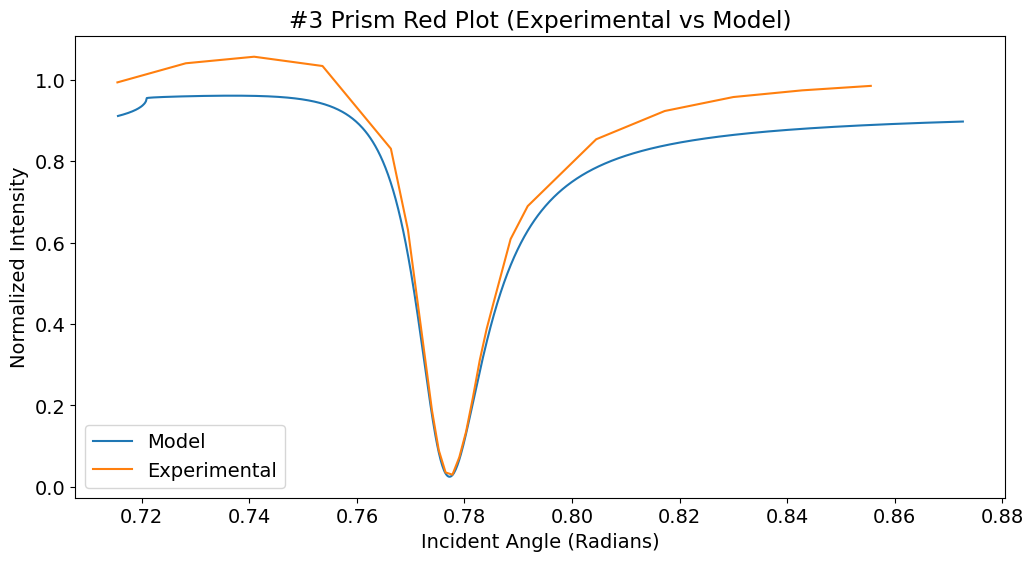

In [43]:
# Model vs actual plot
plt.plot(rad_angles,intensities,label='Model')
plt.plot(red3_data['Theta (deg)']*(np.pi/180),red3_data['Intensity'],label='Experimental')
plt.title('#3 Prism Red Plot (Experimental vs Model)')
plt.xlabel('Incident Angle (Radians)')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.show()

## Try a fit with LMFit

Read the documentation on LMFit (see the links at the top) and/or study the examples in the **Examples** repository to see how to create a custom model function.  Some hints:
* The independent variable is by default called `x`.  Your fit function should also use this, and it needs to be the first argument passed to the function.
* You will want to separate the real and imaginary parts of epsilon into two separate (real) variables.
* Your fitting function does not have to have all of its arguments be fit parameters.  If you assign some to fixed values, these can be left alone.  You will need to declare which variable should be allowed to be adjusted by LMfit.
* The easiest way to accomplish all of the above is to make a "wrapper" function to pass to LMfit that simply calls your model function (after fixing the things above).

In [44]:
# Create a fit function to build into a model

def R_fitter(x, eps_re, eps_im, d, I, N=N_red, wavenum=wavenum_red):
    '''
    Wrapper for reflectance function to pass to
    LMfit Model class.
    '''
    # Removed conversion of degrees to radians here since it will be done below
    return I*R(x, epsilon=complex(eps_re,eps_im), d=d, N=N, wavenum=wavenum)

## Key statement to pull Model class in.
from lmfit import Model

## First argument is the function name.  The last argument is 
#  passed directly to the fitting function and is not adjusted during the fit

model_red = Model(R_fitter, param_names=['eps_re','eps_im','d','I'],N=N_red, wavenum=wavenum_red)
model_green = Model(R_fitter, param_names=['eps_re','eps_im','d','I'],N=N_green, wavenum=wavenum_green)

In [45]:
# Pretty much left the code block above untouched because don't really need to modify it at all
# Red laser
# Making and setting parameters
red_params = model_red.make_params()
red_x_data = red3_data['Theta (deg)'] * (np.pi/180)
red_y_data = red3_data['Intensity']
red_params['eps_re'].value = -9.008
red_params['eps_im'].value = 0.476
red_params['d'].value = 60.88
red_params['I'].value = 1.1 # Intensity correction?
print(red_x_data) # Checking angles in radians

0     0.715479
1     0.728190
2     0.740899
3     0.753609
4     0.766322
5     0.769500
6     0.772678
7     0.773951
8     0.775223
9     0.776493
10    0.777766
11    0.779038
12    0.780309
13    0.781581
14    0.782853
15    0.784126
16    0.785398
17    0.788580
18    0.791760
19    0.804492
20    0.817233
21    0.829988
22    0.842757
23    0.855543
Name: Theta (deg), dtype: float64


[[Model]]
    Model(R_fitter, N='1.515', wavenum='0.009929180321080257')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 24
    # variables        = 4
    chi-square         = 9.4067e-04
    reduced chi-square = 4.7034e-05
    Akaike info crit   = -235.527292
    Bayesian info crit = -230.815077
    R-squared          = 0.99971651
[[Variables]]
    eps_re: -8.99885278 +/- 0.00612574 (0.07%) (init = -9.008)
    eps_im:  0.48180512 +/- 0.00459301 (0.95%) (init = 0.476)
    d:       61.2245949 +/- 0.27080191 (0.44%) (init = 60.88)
    I:       1.09965865 +/- 0.00303142 (0.28%) (init = 1.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(eps_re, d)      = +0.7311
    C(eps_im, d)      = +0.4338
    C(eps_im, I)      = +0.4250
    C(d, I)           = -0.2742
    C(eps_re, I)      = -0.2412
    C(eps_re, eps_im) = +0.1528


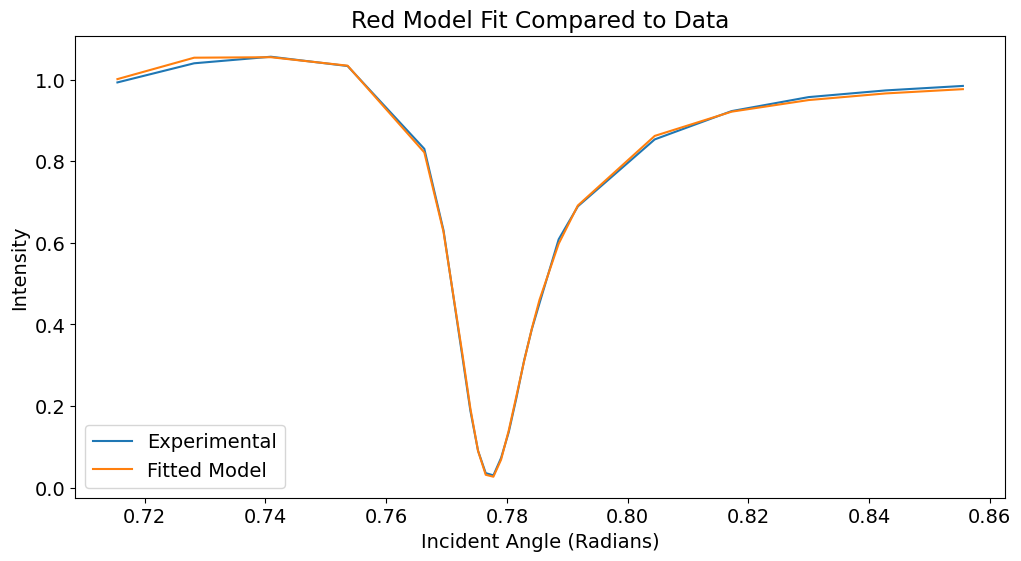

In [46]:
# Run the fit
model_red_fit = model_red.fit(red_y_data,params=red_params,x=red_x_data)

# Results report
print(model_red_fit.fit_report())

# Plot
plt.plot(red_x_data,red_y_data,label='Experimental')
plt.plot(red_x_data,model_red_fit.best_fit,label='Fitted Model') # Uses best fit for, well, best fit
plt.xlabel('Incident Angle (Radians)')
plt.ylabel('Intensity')
plt.title('Red Model Fit Compared to Data')
plt.legend()
plt.show()